In [2]:
from google.colab import files
import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras import Sequential
from keras.layers import Dense, Dropout

In [4]:
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['Levels_Fyi_Salary_Data.csv']))

Saving Levels_Fyi_Salary_Data.csv to Levels_Fyi_Salary_Data.csv


In [ ]:
df.head()

## Data Preprocessing

In [5]:
## Company columns
df.company.fillna(df.company.mode()[0],inplace=True)

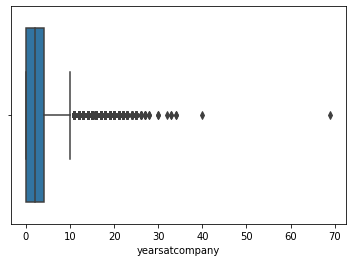

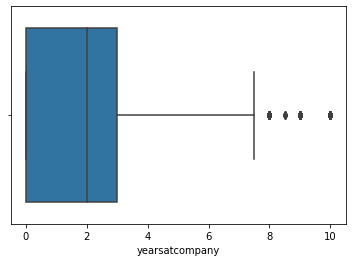

In [6]:
## Years at company
import seaborn as sns
sns.boxplot(x='yearsatcompany',data=df)
plt.show()

df.loc[df.yearsatcompany > 10,'yearsatcompany'] = df.yearsatcompany.median()

import seaborn as sns
sns.boxplot(x='yearsatcompany',data=df)
plt.show()

In [7]:
## BaseSalary
df.basesalary.replace(0,df.basesalary.median(),inplace=True)

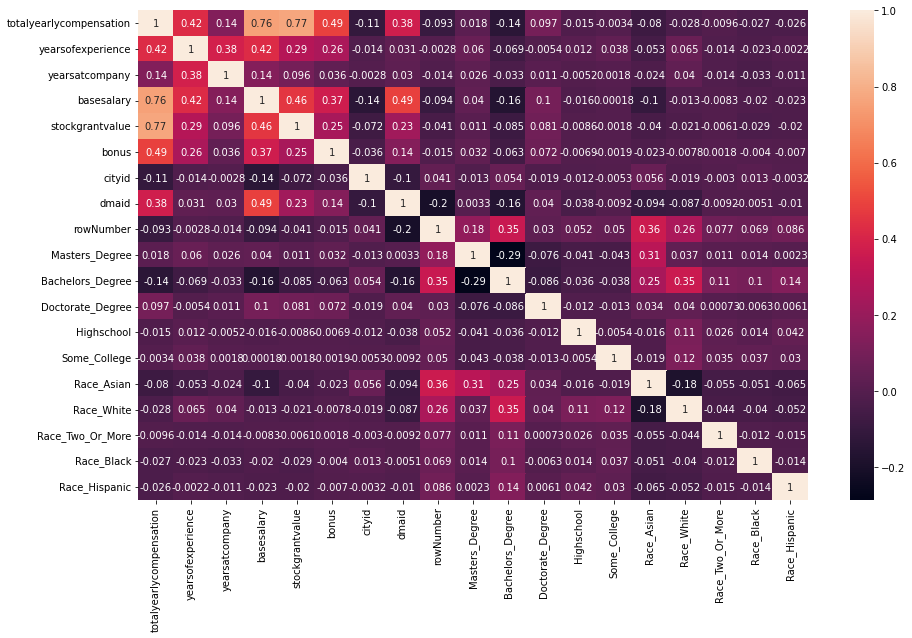

In [8]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

## 1.How much you would get if I join for a position based on number of experiences and location?

In [9]:
data2 = df[['title','yearsofexperience','location','basesalary']]

In [10]:
data2.head()

,title,yearsofexperience,location,basesalary
0,Product Manager,1.5,"Redwood City, CA",107000.0
1,Software Engineer,5.0,"San Francisco, CA",140000.0
2,Product Manager,8.0,"Seattle, WA",155000.0
3,Software Engineering Manager,7.0,"Sunnyvale, CA",157000.0
4,Software Engineer,5.0,"Mountain View, CA",140000.0


In [13]:
data2 = pd.get_dummies(data2)

In [20]:
## Train test split
train_ds,test_ds,y_train,y_test = train_test_split(data2.iloc[:,:-1],data2['basesalary'],test_size=0.2)

## MinMaxScaler
scaler = MinMaxScaler()
train_ds = scaler.fit_transform(train_ds)
test_ds = scaler.transform(test_ds)


In [21]:
from keras import backend as ks
def root_mean_squared_error(y_true, y_pred):
        return ks.sqrt(ks.mean(ks.square(y_pred - y_true))) 


from keras import Sequential 
from keras.layers import Dense, Dropout

model = Sequential(Dense(64,activation='relu',input_dim=1066))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='relu'))

model.compile(optimizer='adam', loss=root_mean_squared_error)

In [22]:
model.fit(train_ds,y_train,epochs=100)

Epoch 1/100
1567/1567 [==============================] - 5s 3ms/step - loss: 119714.2109
Epoch 2/100
1567/1567 [==============================] - 4s 3ms/step - loss: 40541.6914
Epoch 3/100
1567/1567 [==============================] - 4s 3ms/step - loss: 35822.9453
Epoch 4/100
1567/1567 [==============================] - 4s 3ms/step - loss: 33144.0391
Epoch 5/100
1567/1567 [==============================] - 4s 3ms/step - loss: 31287.1094
Epoch 6/100
1567/1567 [==============================] - 4s 2ms/step - loss: 29844.6504
Epoch 7/100
1567/1567 [==============================] - 4s 2ms/step - loss: 28650.2148
Epoch 8/100
1567/1567 [==============================] - 4s 2ms/step - loss: 27463.4629
Epoch 9/100
1567/1567 [==============================] - 4s 2ms/step - loss: 26453.4023
Epoch 10/100
1567/1567 [==============================] - 4s 2ms/step - loss: 25351.8926
Epoch 11/100
1567/1567 [==============================] - 4s 2ms/step - loss: 24155.2422
Epoch 12/100
1567/1567 [=====

In [23]:
ytrain_predction = model.predict(train_ds)
print('Root Mean Square Error',np.sqrt(mean_squared_error(y_train,ytrain_predction)),'\n\n')

Root Mean Square Error 353.86908630701834 




In [25]:
ytest_predction = model.predict(test_ds)
print('Root Mean Square Error',np.sqrt(mean_squared_error(y_test,ytest_predction)),'\n\n')

Root Mean Square Error 2241.085209471951 




## 2. How much you would get if you accept an offer for a position from X company based on number of experiences and location?

In [26]:
data2 = df[['company','title','location','yearsofexperience','basesalary']]

In [27]:
data2.head()

,company,title,location,yearsofexperience,basesalary
0,Oracle,Product Manager,"Redwood City, CA",1.5,107000.0
1,eBay,Software Engineer,"San Francisco, CA",5.0,140000.0
2,Amazon,Product Manager,"Seattle, WA",8.0,155000.0
3,Apple,Software Engineering Manager,"Sunnyvale, CA",7.0,157000.0
4,Microsoft,Software Engineer,"Mountain View, CA",5.0,140000.0


In [28]:
data2 = pd.get_dummies(data2)

In [29]:
data2.head()

,yearsofexperience,basesalary,company_10x Genomics,company_23andMe,company_2U,company_3M,company_3m,company_7-Eleven,company_7-eleven,company_8x8,...,"location_Yeovil, EN, United Kingdom","location_Yerevan, ER, Armenia","location_York, PA","location_Yorktown Heights, NY","location_Yulee, FL","location_Zapopan, JA, Mexico","location_Zaragoza, AR, Spain","location_Zug, ZG, Switzerland","location_Zurich, ZH, Switzerland","location_hod hasharon, HM, Israel"
0,1.5,107000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,140000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8.0,155000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7.0,157000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5.0,140000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
from keras.constraints import MinMaxNorm
## Train test split
train_ds2,test_ds2,y_train2,y_test2 = train_test_split(data2.iloc[:,:-1],data2['basesalary'],test_size=0.2)

## MinMaxScaler
scaler = MinMaxScaler()
train_ds2 = scaler.fit_transform(train_ds2)
test_ds2 = scaler.transform(test_ds2)


In [32]:
from keras import backend as krs
def root_mean_squared_error(y_actual, y_pred):
        return krs.sqrt(krs.mean(krs.square(y_pred - y_actual))) 


from keras import Sequential 
from keras.layers import Dense, Dropout

model2 = Sequential(Dense(64,activation='relu',input_dim=2697))
model2.add(Dense(64,activation='relu'))
model2.add(Dense(1,activation='relu'))

model2.compile(optimizer='adam', loss=root_mean_squared_error)

In [33]:
model2.fit(train_ds2,y_train2,epochs=100)

Epoch 1/100
1567/1567 [==============================] - 8s 4ms/step - loss: 113426.1484
Epoch 2/100
1567/1567 [==============================] - 6s 4ms/step - loss: 39773.8164
Epoch 3/100
1567/1567 [==============================] - 6s 4ms/step - loss: 34257.6133
Epoch 4/100
1567/1567 [==============================] - 6s 4ms/step - loss: 30970.1348
Epoch 5/100
1567/1567 [==============================] - 6s 4ms/step - loss: 28504.6094
Epoch 6/100
1567/1567 [==============================] - 6s 4ms/step - loss: 26752.6973
Epoch 7/100
1567/1567 [==============================] - 6s 4ms/step - loss: 25249.6699
Epoch 8/100
1567/1567 [==============================] - 6s 4ms/step - loss: 24012.1035
Epoch 9/100
1567/1567 [==============================] - 6s 4ms/step - loss: 23022.5078
Epoch 10/100
1567/1567 [==============================] - 6s 4ms/step - loss: 22166.1445
Epoch 11/100
1567/1567 [==============================] - 6s 4ms/step - loss: 21419.6621
Epoch 12/100
1567/1567 [=====

In [34]:
y_train_prediction2 = model2.predict(train_ds2)
print('Root Mean Square Error',np.sqrt(mean_squared_error(y_train2,y_train_prediction2)),'\n\n')

Root Mean Square Error 392.2533628101271 




In [35]:
y_test_prediction2 = model2.predict(test_ds2)
print('Root Mean Square Error',np.sqrt(mean_squared_error(y_test2,y_test_prediction2)),'\n\n')

Root Mean Square Error 2299.621686193547 




## 3. How much you will be getting for a position after Y years joining to X company?

In [38]:
data_set3 = df[['company','title','yearsatcompany','basesalary']]

In [39]:
data_set3 = pd.get_dummies(data_set3)

In [40]:
data_set3.head()

,yearsatcompany,basesalary,company_10x Genomics,company_23andMe,company_2U,company_3M,company_3m,company_7-Eleven,company_7-eleven,company_8x8,...,title_Marketing,title_Mechanical Engineer,title_Product Designer,title_Product Manager,title_Recruiter,title_Sales,title_Software Engineer,title_Software Engineering Manager,title_Solution Architect,title_Technical Program Manager
0,1.5,107000.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,3.0,140000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.0,155000.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,5.0,157000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,3.0,140000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [42]:
## Train test split
train_ds3,test_ds3,y_train3,y_test3 = train_test_split(data_set3.iloc[:,:-1],data_set3['basesalary'],test_size=0.2)

## MinMaxScaler
scaler = MinMaxScaler()
train_ds3 = scaler.fit_transform(train_ds3)
test_ds3 = scaler.transform(test_ds3)


In [43]:
from keras import Sequential 
from keras.layers import Dense, Dropout

model3 = Sequential(Dense(64,activation='relu',input_dim=1647))
model3.add(Dense(64,activation='relu'))
model3.add(Dense(1,activation='relu'))

model3.compile(optimizer='adam', loss=root_mean_squared_error)

In [44]:
model3.fit(train_ds3,y_train3,epochs=50)

Epoch 1/50
1567/1567 [==============================] - 9s 5ms/step - loss: 122319.0312
Epoch 2/50
1567/1567 [==============================] - 5s 3ms/step - loss: 49705.5898
Epoch 3/50
1567/1567 [==============================] - 5s 3ms/step - loss: 45809.5430
Epoch 4/50
1567/1567 [==============================] - 5s 3ms/step - loss: 43500.7344
Epoch 5/50
1567/1567 [==============================] - 5s 3ms/step - loss: 41471.8164
Epoch 6/50
1567/1567 [==============================] - 5s 3ms/step - loss: 39416.4492
Epoch 7/50
1567/1567 [==============================] - 5s 3ms/step - loss: 37176.5781
Epoch 8/50
1567/1567 [==============================] - 5s 3ms/step - loss: 34772.6992
Epoch 9/50
1567/1567 [==============================] - 5s 3ms/step - loss: 32200.2637
Epoch 10/50
1567/1567 [==============================] - 5s 3ms/step - loss: 29376.9941
Epoch 11/50
1567/1567 [==============================] - 5s 3ms/step - loss: 26461.7656
Epoch 12/50
1567/1567 [=================

In [45]:
y_train_prediction3 = model3.predict(train_ds3)
print('Root Mean Square Error',np.sqrt(mean_squared_error(y_train3,y_train_prediction3)),'\n\n')

Root Mean Square Error 433.8942245797979 




In [46]:
y_test_prediction3 = model3.predict(test_ds3)
print('Root Mean Square Error',np.sqrt(mean_squared_error(y_test3,y_test_prediction3)),'\n\n')

Root Mean Square Error 1761.8651562807947 


